# Árboles de decisión II
## author: Virginia Ordoño Bernier
## date: february 2024

En este ejercicio se aplica el  modelo *Árbol de Decisión* al dataset California Housing (regresión)

### 1. Gestión de datos

#### 1.1 Carga y creación del dataframe

In [1]:
import pandas as pd
import inflection
from sklearn.datasets import fetch_california_housing

# Descarga el conjunto de datos
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convertir los datos en DataFrame y cambiar nombre columnas
df_housing = pd.DataFrame(data=X, columns=housing.feature_names)
df_housing.columns = [col.lower().replace(' ', '_').rstrip('_') for col in df_housing.columns]

# Agrega target
df_housing['target'] = y

df_housing.head()


,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### 1.2 Comprobación nulos y tipo de datos

In [2]:
print(f'Filas: {df_housing.shape[0]}')
print(f'{df_housing.isna().sum()}')

Filas: 20640
medinc        0
houseage      0
averooms      0
avebedrms     0
population    0
aveoccup      0
latitude      0
longitude     0
target        0
dtype: int64


In [3]:
df_housing.dtypes

medinc        float64
houseage      float64
averooms      float64
avebedrms     float64
population    float64
aveoccup      float64
latitude      float64
longitude     float64
target        float64
dtype: object

#### 1.3 Correlación de variables

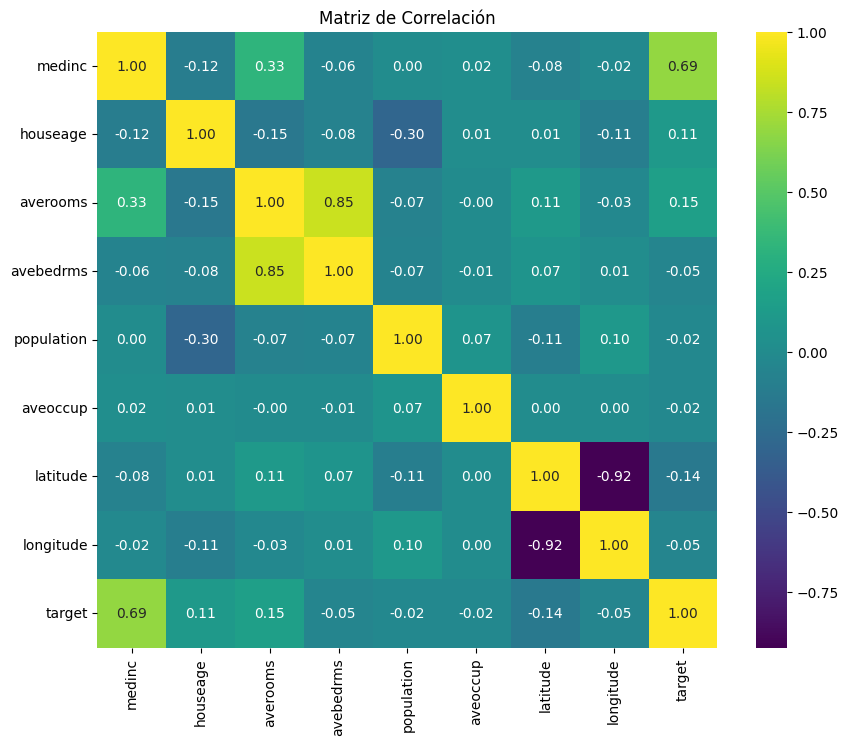

            medinc  houseage  averooms  avebedrms  population  aveoccup  \
medinc        1.00     -0.12      0.33      -0.06        0.00      0.02   
houseage     -0.12      1.00     -0.15      -0.08       -0.30      0.01   
averooms      0.33     -0.15      1.00       0.85       -0.07     -0.00   
avebedrms    -0.06     -0.08      0.85       1.00       -0.07     -0.01   
population    0.00     -0.30     -0.07      -0.07        1.00      0.07   
aveoccup      0.02      0.01     -0.00      -0.01        0.07      1.00   
latitude     -0.08      0.01      0.11       0.07       -0.11      0.00   
longitude    -0.02     -0.11     -0.03       0.01        0.10      0.00   
target        0.69      0.11      0.15      -0.05       -0.02     -0.02   

            latitude  longitude  target  
medinc         -0.08      -0.02    0.69  
houseage        0.01      -0.11    0.11  
averooms        0.11      -0.03    0.15  
avebedrms       0.07       0.01   -0.05  
population     -0.11       0.10   -0.02

In [4]:
# Crear una matriz de correlación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_housing.corr()

# Visualizar la matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Imprimir la matriz de correlación con redondeo a 2 decimales
# print("Matriz de Correlación:")
print(correlation_matrix.round(2))

#### 1.4. Lectura correlación de variables

Correlación fuerte positiva:
- target <=> med_inc (ingreso medio). Si el ingreso medio aumenta, la variable objetivo también tiende a aumentar.

Correlación fuerte negativa:
- target <=> house_age, latitude y longitude. Si las variables disminuyen, la variable objetivo tiende a aumentar ligeramente.

Multicolinealidad
- ave_rooms <=>  ave_bedrms (0.85). Esto puede afectar la interpretación de los coeficientes en un modelo de regresión y podría ser algo a tener en cuenta al seleccionar variables predictoras.

Poca correlación
- target <=> population y ave_occup. Pueden no ser tan importantes en la predicción de la variable objetivo.

### 1.5. Preparación de datos para el entrenamiento

In [5]:
from sklearn.model_selection import train_test_split

X = df_housing.drop('target', axis=1)
y = df_housing['target']

# Divide el DataFrame en conjuntos de entrenamiento y prueba 
train, test = train_test_split(df_housing, test_size=0.33, random_state=42)

# Reseteo de índices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Separación características y etiquetas
X_train = train.drop('target', axis=1)  
y_train = train['target']  
X_test = test.drop('target', axis=1)  
y_test = test['target']

print("Conjunto de entrenamiento:")
print(X_train.head()) 

print("\nConjunto de prueba:")
print(X_test.head())  


Conjunto de entrenamiento:
   medinc  houseage  averooms  avebedrms  population  aveoccup  latitude  \
0  0.9809      19.0  3.187726   1.129964       726.0  2.620939     33.98   
1  4.2232      33.0  6.189696   1.086651      1015.0  2.377049     37.46   
2  3.5488      42.0  4.821577   1.095436      1044.0  4.331950     33.79   
3  1.6469      24.0  4.274194   1.048387      1686.0  4.532258     35.87   
4  3.9909      14.0  4.608303   1.089350      2738.0  2.471119     37.54   

   longitude  
0    -118.28  
1    -122.23  
2    -118.26  
3    -119.26  
4    -121.96  

Conjunto de prueba:
   medinc  houseage  averooms  avebedrms  population  aveoccup  latitude  \
0  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
1  2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
2  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
3  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
4  3.7250      34.0  5.49

## MODELO: ÁRBOL DE DECISIÓN (REGRESIÓN)

#### Selección de los mejores hiperparámetros

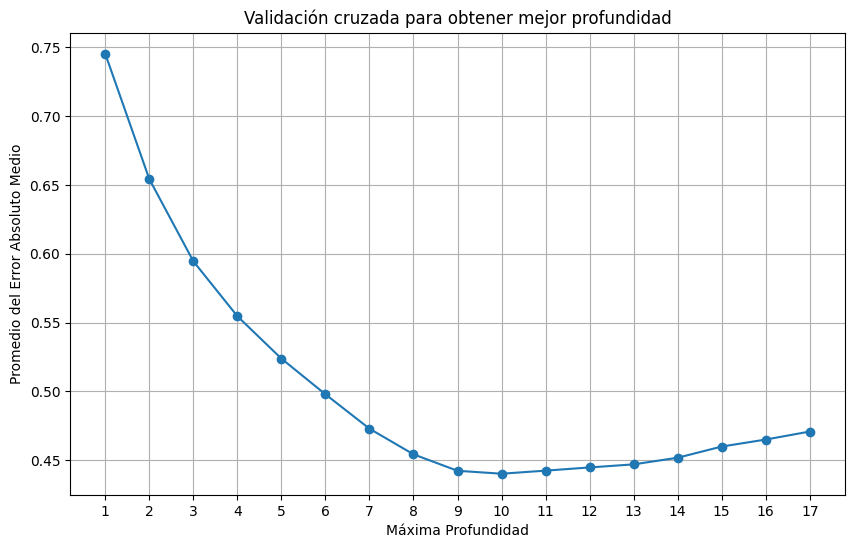

Mejor profundidad: 10
Menor Valor Absoluto Medio: 0.44


In [6]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Preparación de los datos
train, test = train_test_split(df_housing, test_size=0.3, random_state=42)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

# Configuración de la validación cruzada
SPLITS = 5

# Número de atributos en el conjunto de datos 
NUM_ATTRIBUTES = len(list(df_housing))

# Definir el nivel de profundidad del árbol como constante
DEPTH_RANGE = range(1, NUM_ATTRIBUTES * 2) 

# Definir el rango de profundidad
total_scores = []
best_depth = None
min_mae = float('inf')  # Cambiado a infinito para garantizar que se actualice en la primera iteración

cv = KFold(n_splits=SPLITS, shuffle=True, random_state=42)

# Iteración sobre diferentes niveles de profundidad
for depth in DEPTH_RANGE:
    
    fold_accuracy = [] # Almacenar la precisión de cada división/iteración

    model = DecisionTreeRegressor(max_depth=depth)

    for train_fold, test_fold in cv.split(train):
        
        f_train = train.iloc[train_fold]
        f_test = train.iloc[test_fold]

        model.fit(X=f_train.drop(['target'], axis=1), y=f_train['target'])
        
        y_pred = model.predict(f_test.drop(['target'], axis=1))

        # Error medio absoluto de cada iteración
        mae = mean_absolute_error(f_test['target'], y_pred)
        fold_accuracy.append(mae)

    # Promedio del error absoluto medio
    avg_mae = np.mean(fold_accuracy)
    # Almacenar el promedio del error absoluto medio
    total_scores.append(avg_mae)

    # Actualizar el valor mínimo del error absoluto medio y la mejor profundidad
    if avg_mae < min_mae:
        min_mae = avg_mae
        best_depth = depth

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(DEPTH_RANGE, total_scores, marker='o', linestyle='-')
plt.title('Validación cruzada para obtener mejor profundidad')
plt.xlabel('Máxima Profundidad')
plt.ylabel('Promedio del Error Absoluto Medio')
plt.xticks(DEPTH_RANGE)
plt.grid(True)
plt.show()

# Print the results
print(f"Mejor profundidad: {best_depth}")
print(f"Menor Valor Absoluto Medio: {min_mae:.2f}")

#### Contrucción del modelo con la mejor profundidad

Error absoluto medio: 0.43


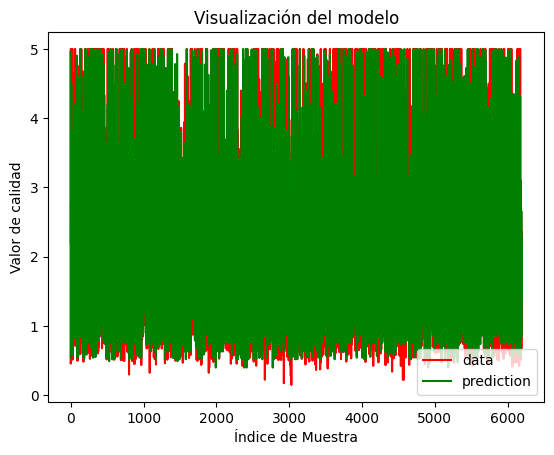

In [7]:
model = DecisionTreeRegressor(max_depth = best_depth)

# Training with all the group
model.fit(
    X = train.drop(['target'], axis = 1),
    y = train['target']
)

# Prediction 
y_pred = model.predict( X = test.drop(['target'], axis = 1))

# Evaluation
mae = mean_absolute_error(test['target'], y_pred)
print(f'Error absoluto medio: {round(mae, 2)}')

# Visualization
xx = np.arange(test['target'].shape[0])
plt.plot(xx, test['target'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title('Visualización del modelo')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor de las casas')
plt.show()


## Visualización del árbol con todas las características

In [8]:
from IPython.display import display
import graphviz
from sklearn.tree import export_graphviz 

columns_names = list(df_housing.columns.drop('target'))

# Crear un archivo DOT que representa el árbol de decisión (en este caso se devuelve como cadena)
dot_data = export_graphviz(model, out_file=None,
                    feature_names = columns_names ,
                    rounded = True, filled = True, special_characters=True)

# Generar el gráfico del árbol de decisión desde el archivo DOT
graph = graphviz.Source(dot_data)

#graph.view("arbol_de_decision")  # Esto guardará el gráfico en un archivo llamado "arbol_de_decision.pdf"
graph

## Importancia de las variables

Informe de Importancia de las Variables:
  Características  Importancia
0          medinc     0.602975
5        aveoccup     0.141685
7       longitude     0.075820
6        latitude     0.071165
1        houseage     0.043160
2        averooms     0.037115
4      population     0.016600
3       avebedrms     0.011481


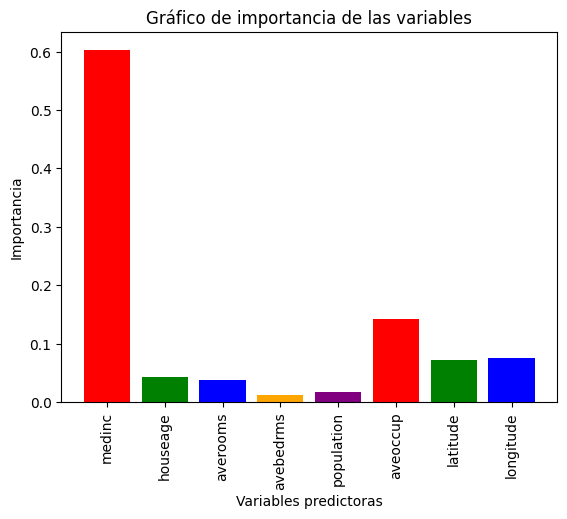

In [9]:
features_names = df_housing.columns[:-1]

# Cargamos la importancia de las características
importances = model.feature_importances_

# Create dataframe
feature_importance_df = pd.DataFrame({'Características':features_names, 'Importancia': importances})

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostramos
print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(features_names, importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()